# Workshop Python Image Analysis
*Martijn Wehrens, September 2025*

**Estimated time:** XX mins presenting + YY mins exercises

## Chapter 5: A very basic introduction into machine learning

<font face='Times New Roman' color=red>This notebook will probably need to be run on Google colab or the like, as laptops might not have the right architecture to run this.</font>

In [43]:
import torch
from torch import nn

import numpy as np

import tifffile as tiff
import matplotlib.pyplot as plt

In [34]:
# This code defines a VERY simple model for 12x12 pixels

class VerySimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(12*12, 1)

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear(x)
        return logits

# now test the neural network
simpleNN = VerySimpleNN().to('mps')
test_data = torch.rand(1, 12, 12, device='mps')  # random 12x12 image
pred = simpleNN(test_data)
print(pred)

tensor([[-0.4479]], device='mps:0', grad_fn=<LinearBackward0>)


In [ ]:
# Now acquire the weights
weights = simpleNN.linear.weight.detach().cpu().numpy()
bias    = simpleNN.linear.bias.detach().cpu().numpy()
# print(weights)
# 
test_data_np = test_data.cpu().numpy().flatten()
# print(test_data_np)
# And manually calculate the outcome
outcome = np.sum(test_data_np*weights[0]) + bias
print(outcome)

[-0.44785488]


In [26]:

# test_data_np.flatten()
# weights[0]

In [25]:
np.sum(test_data_np.flatten()*weights[0])

np.float32(-0.3135873)

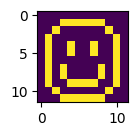

In [47]:
# Now define a data class, which actually only produces two pictures, 
# either a happy or sad emoji, together with annotation

# Two image paths
img_happy_path = '/Users/m.wehrens/Documents/git_repos/_UVA/2025_teaching_Py_image-analysis/Workshop_Py_image-analysis_2025/images/ML/smile.tif'
img_sad_path   = '/Users/m.wehrens/Documents/git_repos/_UVA/2025_teaching_Py_image-analysis/Workshop_Py_image-analysis_2025/images/ML/sad.tif'

# Load images
img_happy = tiff.imread(img_happy_path)
img_sad   = tiff.imread(img_sad_path)

# Show one image
fig, ax = plt.subplots(1,1, figsize=(3/2.54, 3/2.54))
_=ax.imshow(img_happy)